# Problem Statement:- In this dataset our target variable is "capacity_mw" and many other predictors (independent variables) are also present.This is the problem of Regression.

Importing important libraries of python

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [316]:
#loading the dataset
df=pd.read_csv("globalpower.csv")

In [317]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [319]:
#lets check the dimensions of the dataset.
df.shape

(908, 25)

In [320]:
#Lets check for the null values in the columns
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [321]:
#As we can see that few columns of our dataset are completely contains nan values hence we are removing that particular columns.
df=df.drop(['wepp_id',"other_fuel3","estimated_generation_gwh","other_fuel2"], axis = 1)

In [322]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
#checking the information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                862 non-null    float64
 6   longitude               862 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   other_fuel1             199 non-null    object 
 9   commissioning_year      528 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  908 non-null    object 
 12  url                     908 non-null    object 
 13  geolocation_source      889 non-null    object 
 14  year_of_capacity_data   520 non-null    fl

# Exploratory Data Analysis

In [324]:
#Checking different columns
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source'],
      dtype='object')

In [325]:
df["commissioning_year"].value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1939.0     1
1927.0     1
1949.0     1
1956.0     1
1969.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [326]:
df["geolocation_source"].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [327]:
df["country"].value_counts()

IND    908
Name: country, dtype: int64

In [328]:
df["country_long"].value_counts()

India    908
Name: country_long, dtype: int64

In [329]:
df["name"].value_counts()

VALANTHARVI GT                                 1
BUDGE BUDGE                                    1
SHRIRAM RAYONS PLANT                           1
Mirpur Kalan - Alianz Eco Solar Power Plant    1
MANI DPH                                       1
                                              ..
RAJPURA DARIBA MINE                            1
SATNA CEMENT PLANT                             1
CHANDA CEMENT WORKS                            1
KCSF SANGUR                                    1
RAMANAGARAM MILL                               1
Name: name, Length: 908, dtype: int64

In [330]:
df["gppd_idnr"].value_counts()

IND0000176    1
IND0000497    1
IND0000036    1
IND0000515    1
WRI1026795    1
             ..
IND0000460    1
WRI1026777    1
WRI1026083    1
WRI1026082    1
IND0000219    1
Name: gppd_idnr, Length: 908, dtype: int64

In [331]:
df["primary_fuel"].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [332]:
df["owner"].value_counts()

Sterling Agro Industries ltd.                  4
Acc Acc ltd                                    4
Jk Cement ltd                                  4
Shree Sugars ltd                               3
Powerica Limited                               3
                                              ..
S J Green Park Energy Private Limited          1
Finehope Allied Engineering Private Limited    1
Vikram Vikram cement                           1
Dr Ssk ltd                                     1
Natural Alliend indust                         1
Name: owner, Length: 280, dtype: int64

In [333]:
own=df["owner"].value_counts()

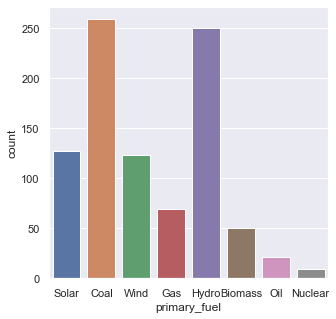

In [334]:
#Lets check the counts of different kind of fuel powered powerplants.
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="primary_fuel", data=df)

From above the countplot we can state:
    "Coal"  &  "Hydroelectric" -- Powerplants are dominating in our dataset.
    "Nuclear","Oil" & "Biomass" -- Powerplants are very less in count in our dataset.
    "Solar powered" & "Wind" -- Powerplants are in moderate numbers in our dataset.

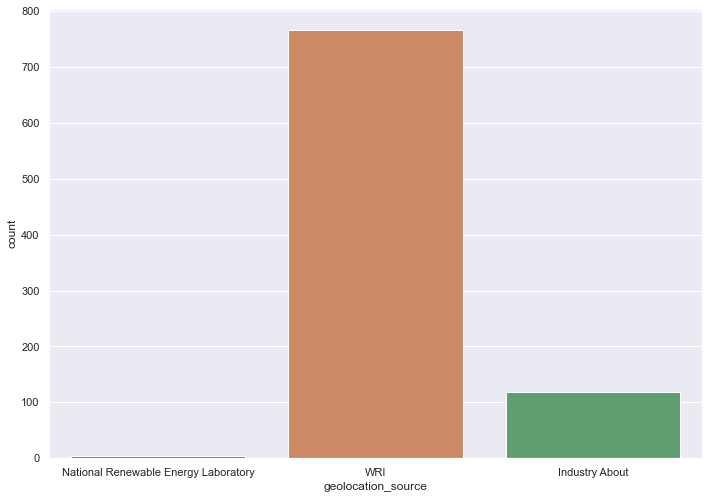

In [335]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="geolocation_source", data=df)

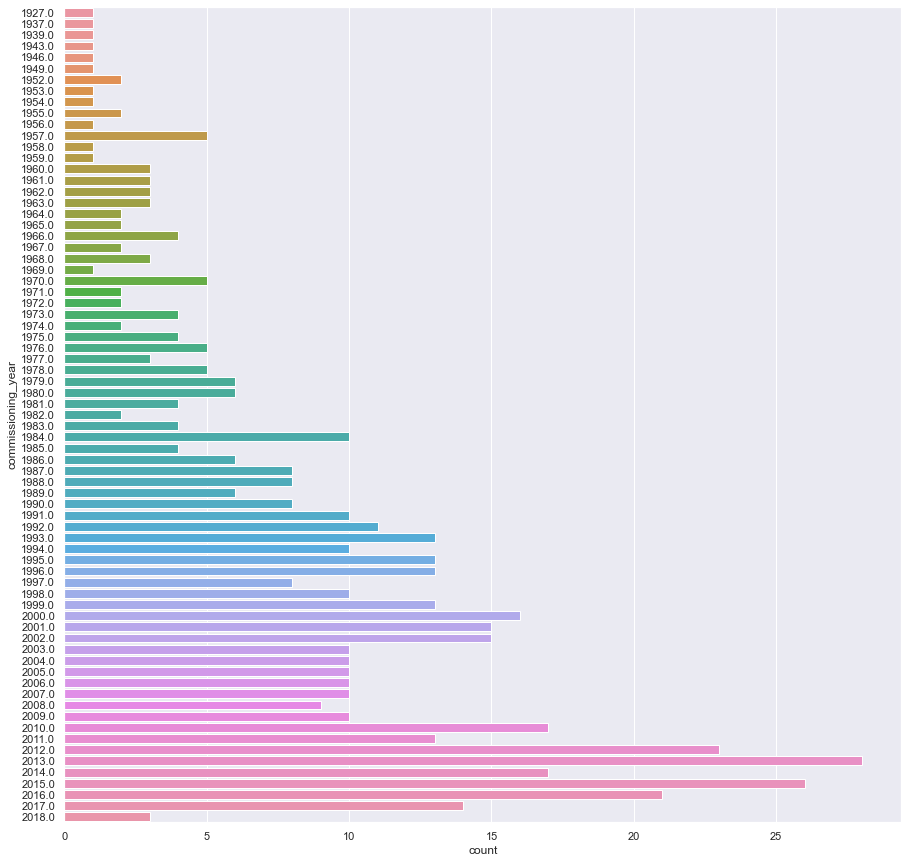

In [336]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.countplot(y="commissioning_year", data=df)

We can observe from the above countplot of "commissioning_year" that:
  1.  Maximum number of powerplants were commissioned in year "2013"
  2.  From 2009 to 2017 was the time in which most of powerplants were started.
  3. From above plots we can see from 1980's maximum number of the powerplants were started --which we    think may be due to high industrialisation and urbanisation.

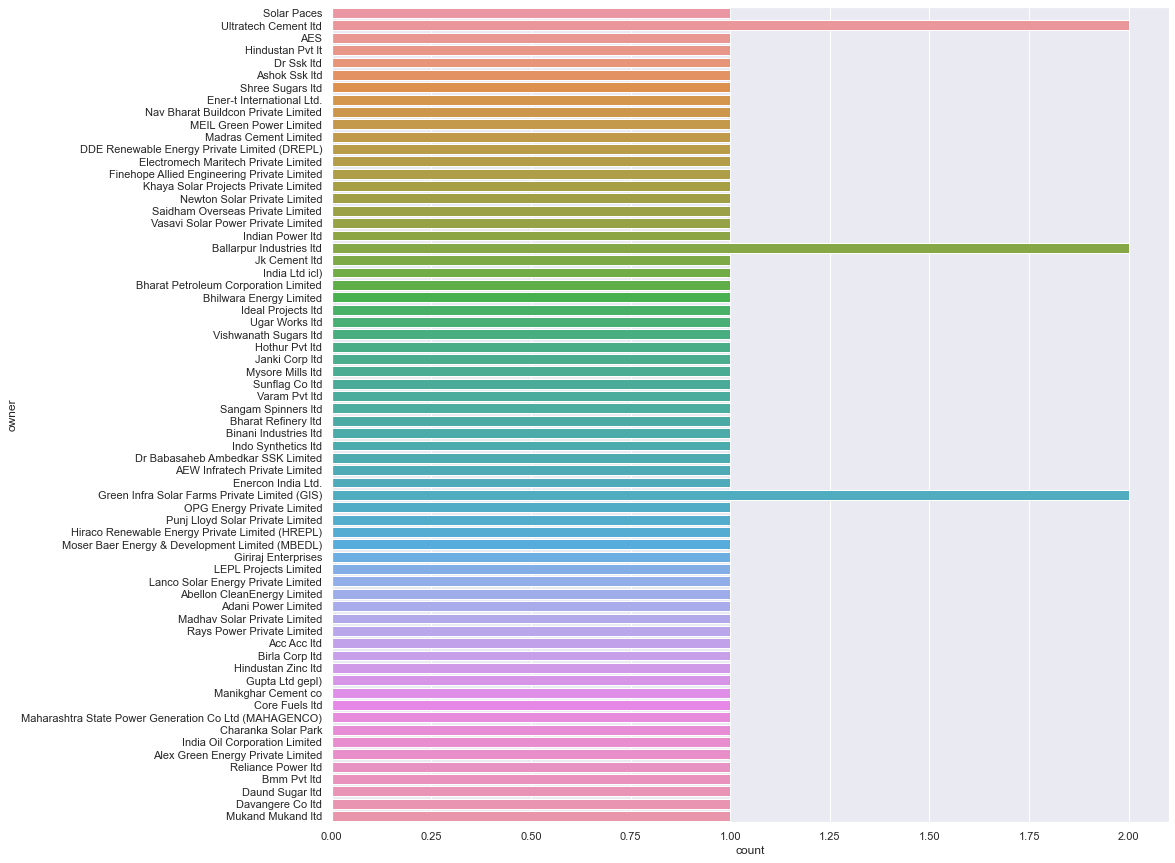

In [337]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.countplot(y="owner", data=df.iloc[0:180])

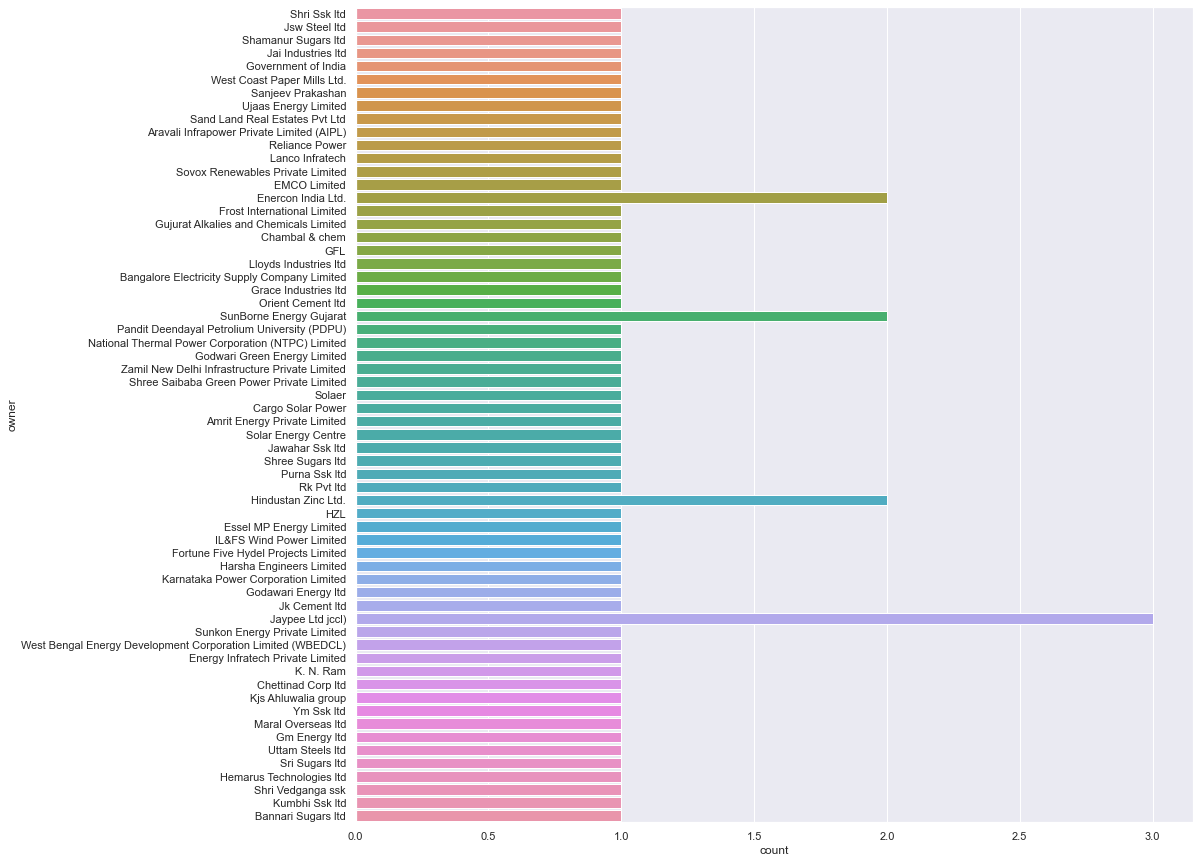

In [338]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.countplot(y="owner", data=df.iloc[180:360])

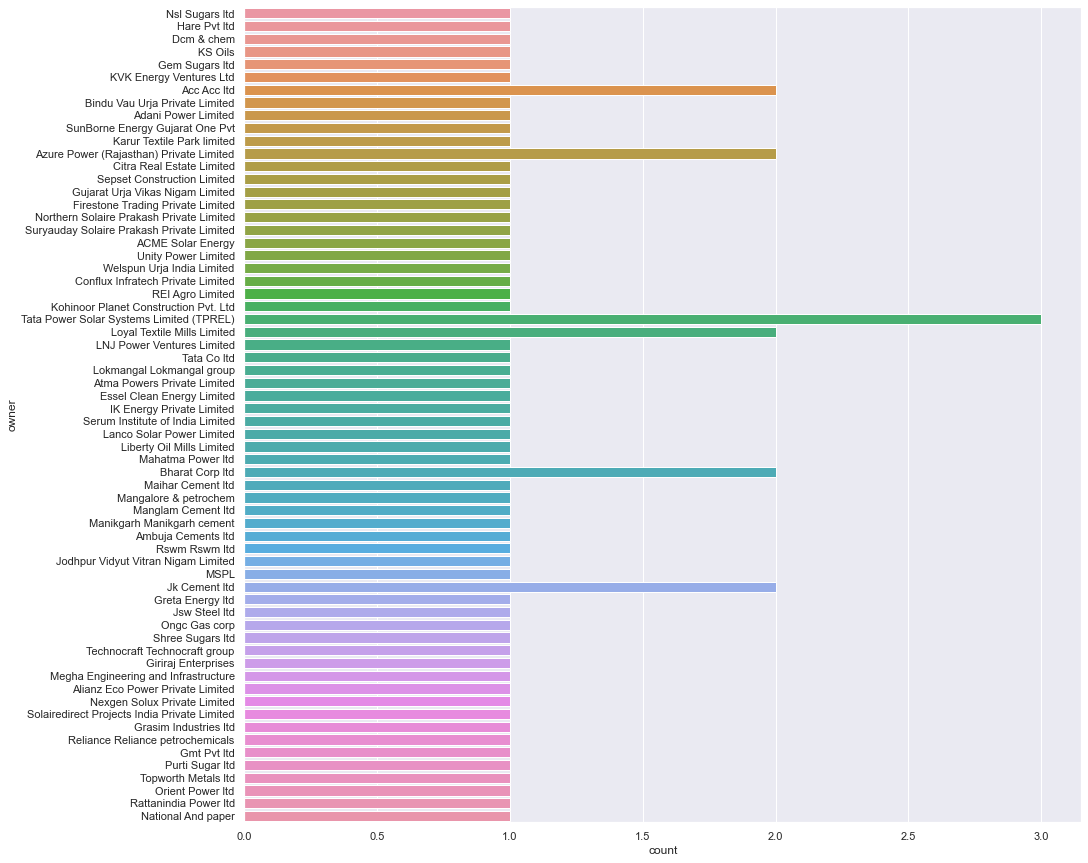

In [339]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.countplot(y="owner", data=df.iloc[360:540])

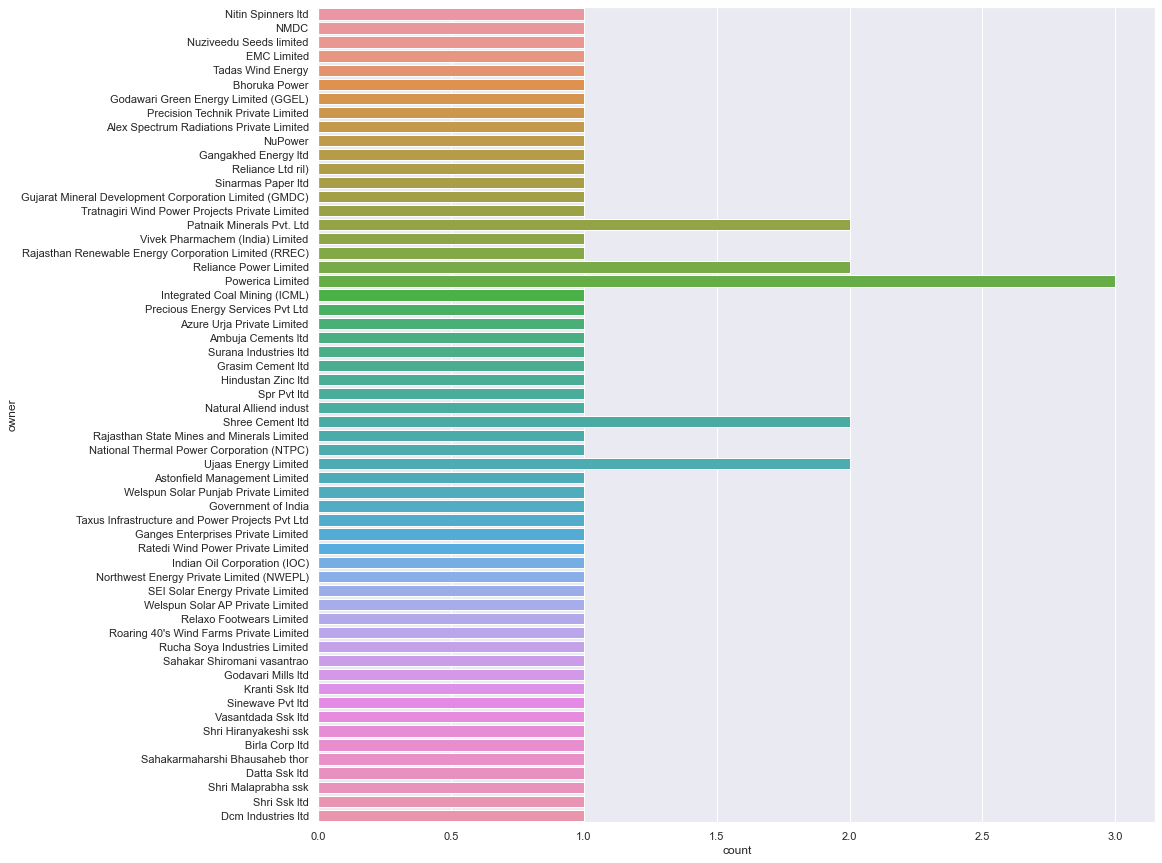

In [340]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.countplot(y="owner", data=df.iloc[540:720])

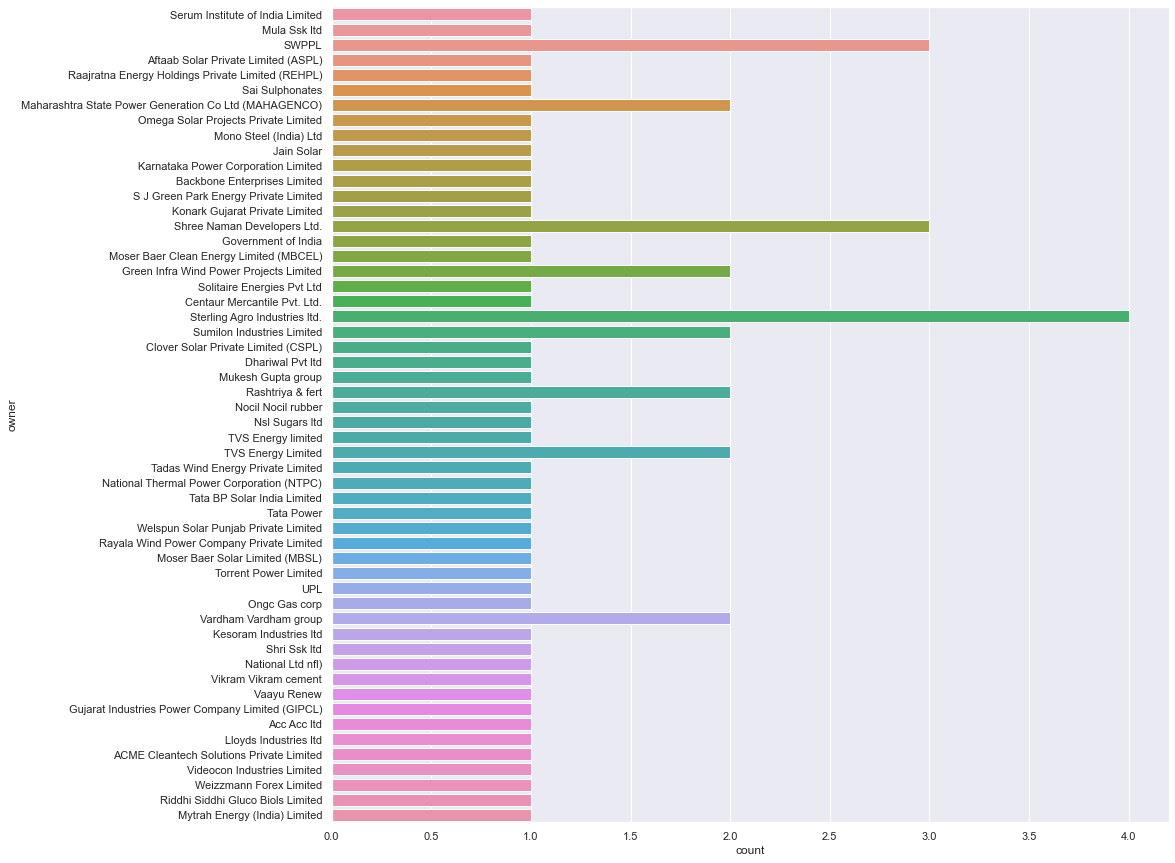

In [341]:
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.countplot(y="owner", data=df.iloc[720:900])

In [342]:
own

Sterling Agro Industries ltd.                  4
Acc Acc ltd                                    4
Jk Cement ltd                                  4
Shree Sugars ltd                               3
Powerica Limited                               3
                                              ..
S J Green Park Energy Private Limited          1
Finehope Allied Engineering Private Limited    1
Vikram Vikram cement                           1
Dr Ssk ltd                                     1
Natural Alliend indust                         1
Name: owner, Length: 280, dtype: int64

In [343]:

data = [df["owner"], df["capacity_mw"]]

headers = ["owner", "capacity_mw"]

dfa = pd.concat(data, axis=1, keys=headers)



In [344]:
dfa

,owner,capacity_mw
0,Solar Paces,2.5
1,Ultratech Cement ltd,98.0
2,AES,39.2
3,NaN,135.0
4,NaN,1800.0
...,...,...
903,NaN,1600.0
904,Karnataka Power Corporation Limited,3.0
905,NaN,25.5
906,Hindustan Zinc ltd,80.0


In [345]:
#Country_long and country column has the same value in throughout dataset,hence there is no need to keep these columns for analysis.
df=df.drop(['country_long',"country"], axis = 1)

In [346]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


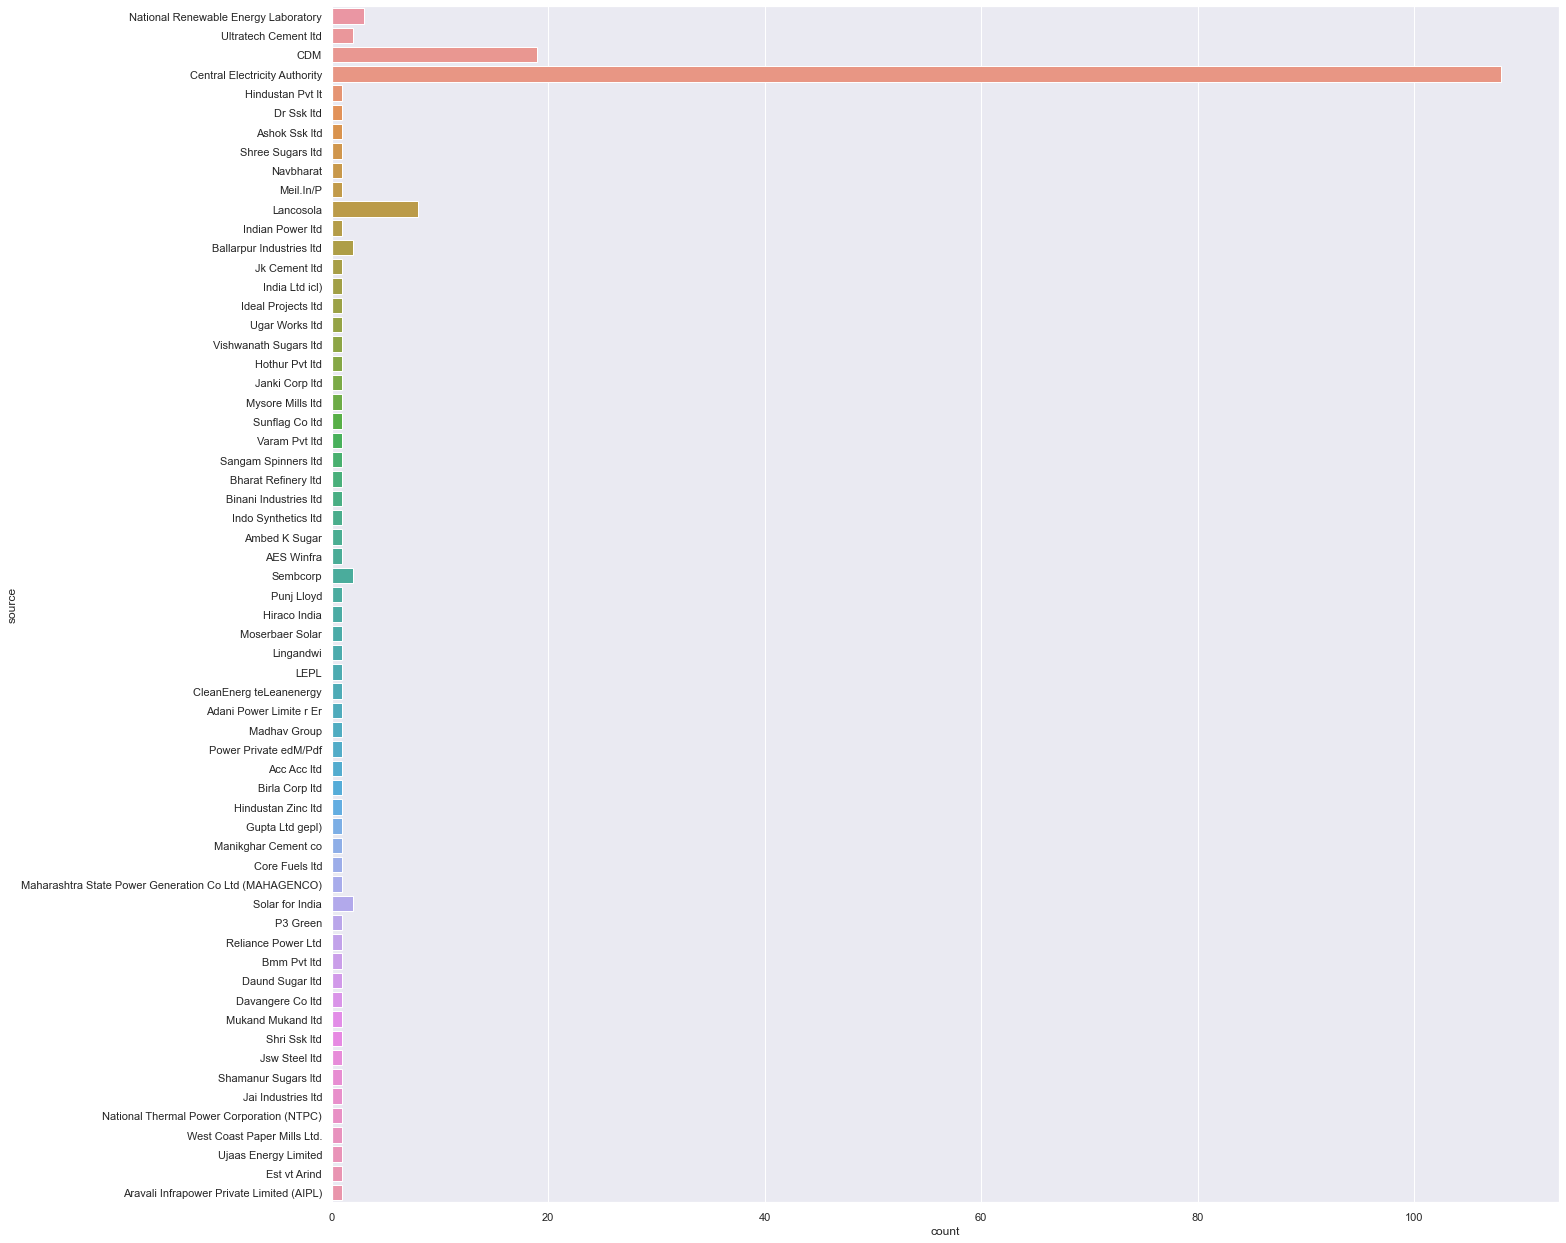

In [347]:
sns.set(rc={'figure.figsize':(22,22)})
ax = sns.countplot(y="source", data=df[0:200])

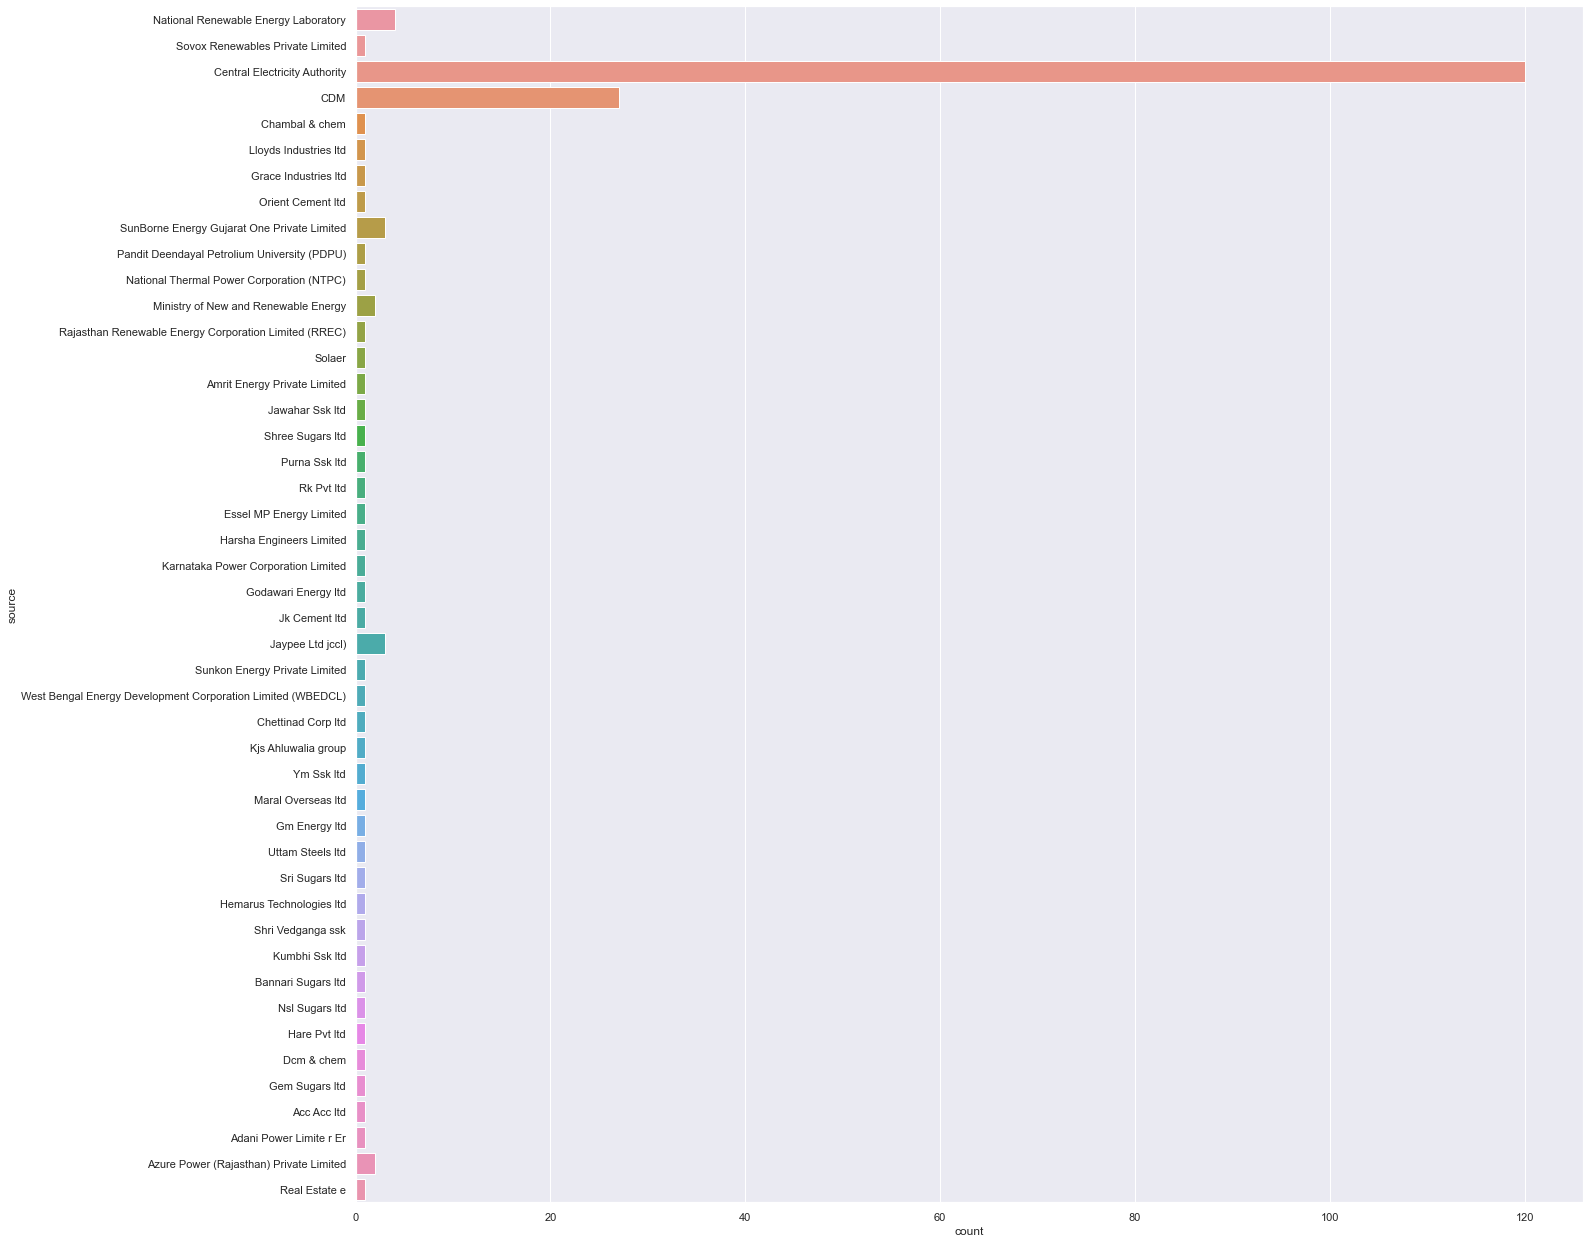

In [348]:
sns.set(rc={'figure.figsize':(22,22)})
ax = sns.countplot(y="source", data=df[200:400])

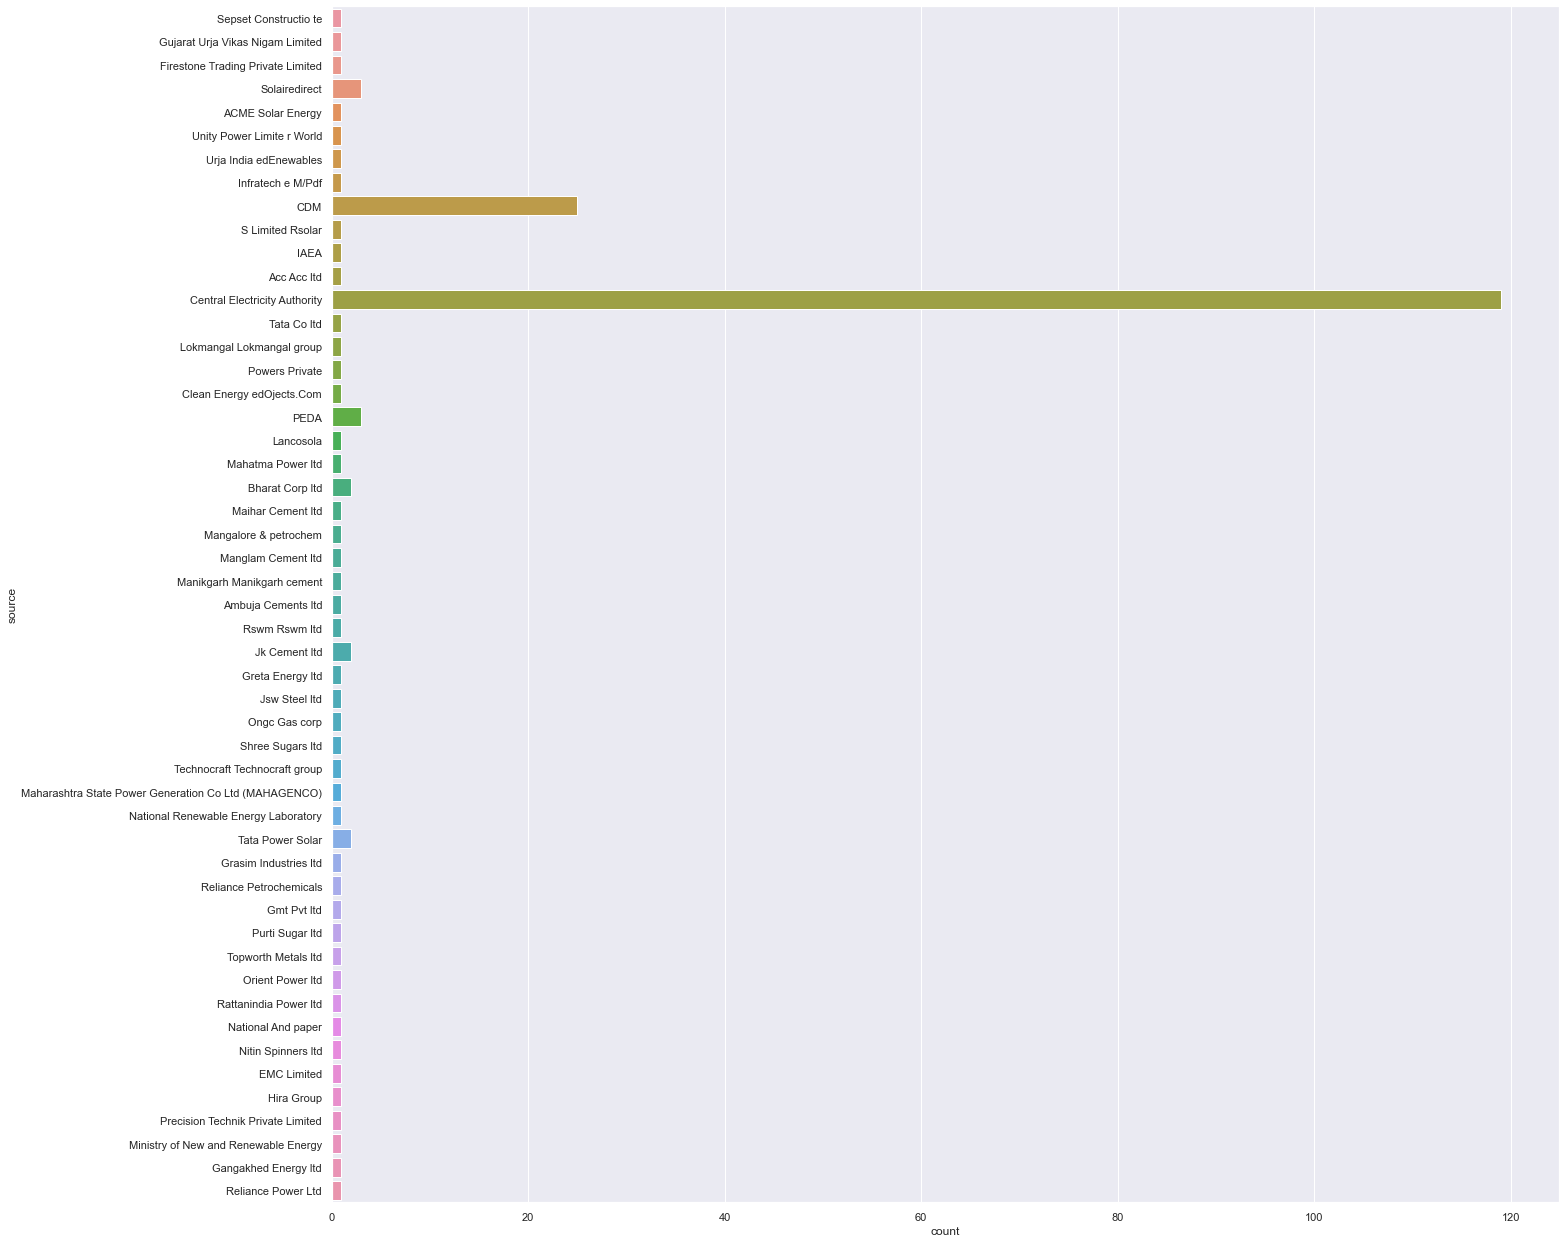

In [349]:
sns.set(rc={'figure.figsize':(22,22)})
ax = sns.countplot(y="source", data=df[400:600])

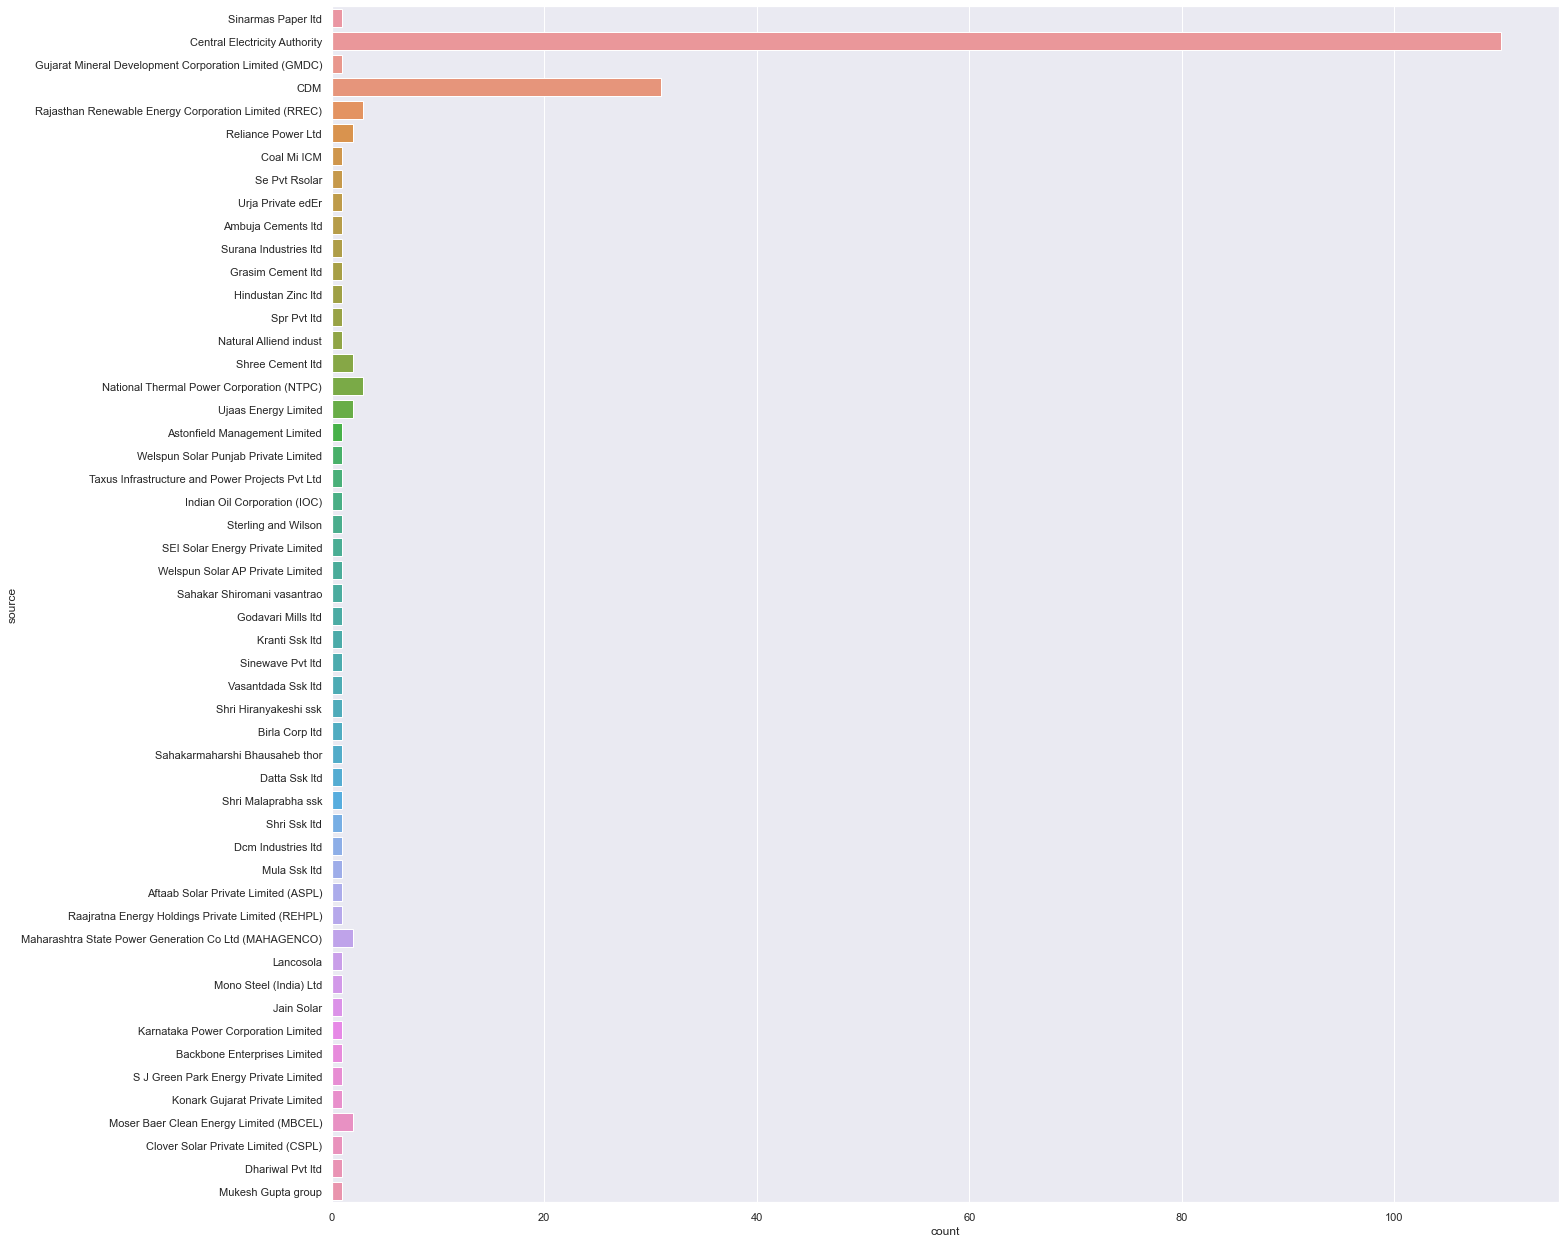

In [350]:
sns.set(rc={'figure.figsize':(22,22)})
ax = sns.countplot(y="source", data=df[600:800])

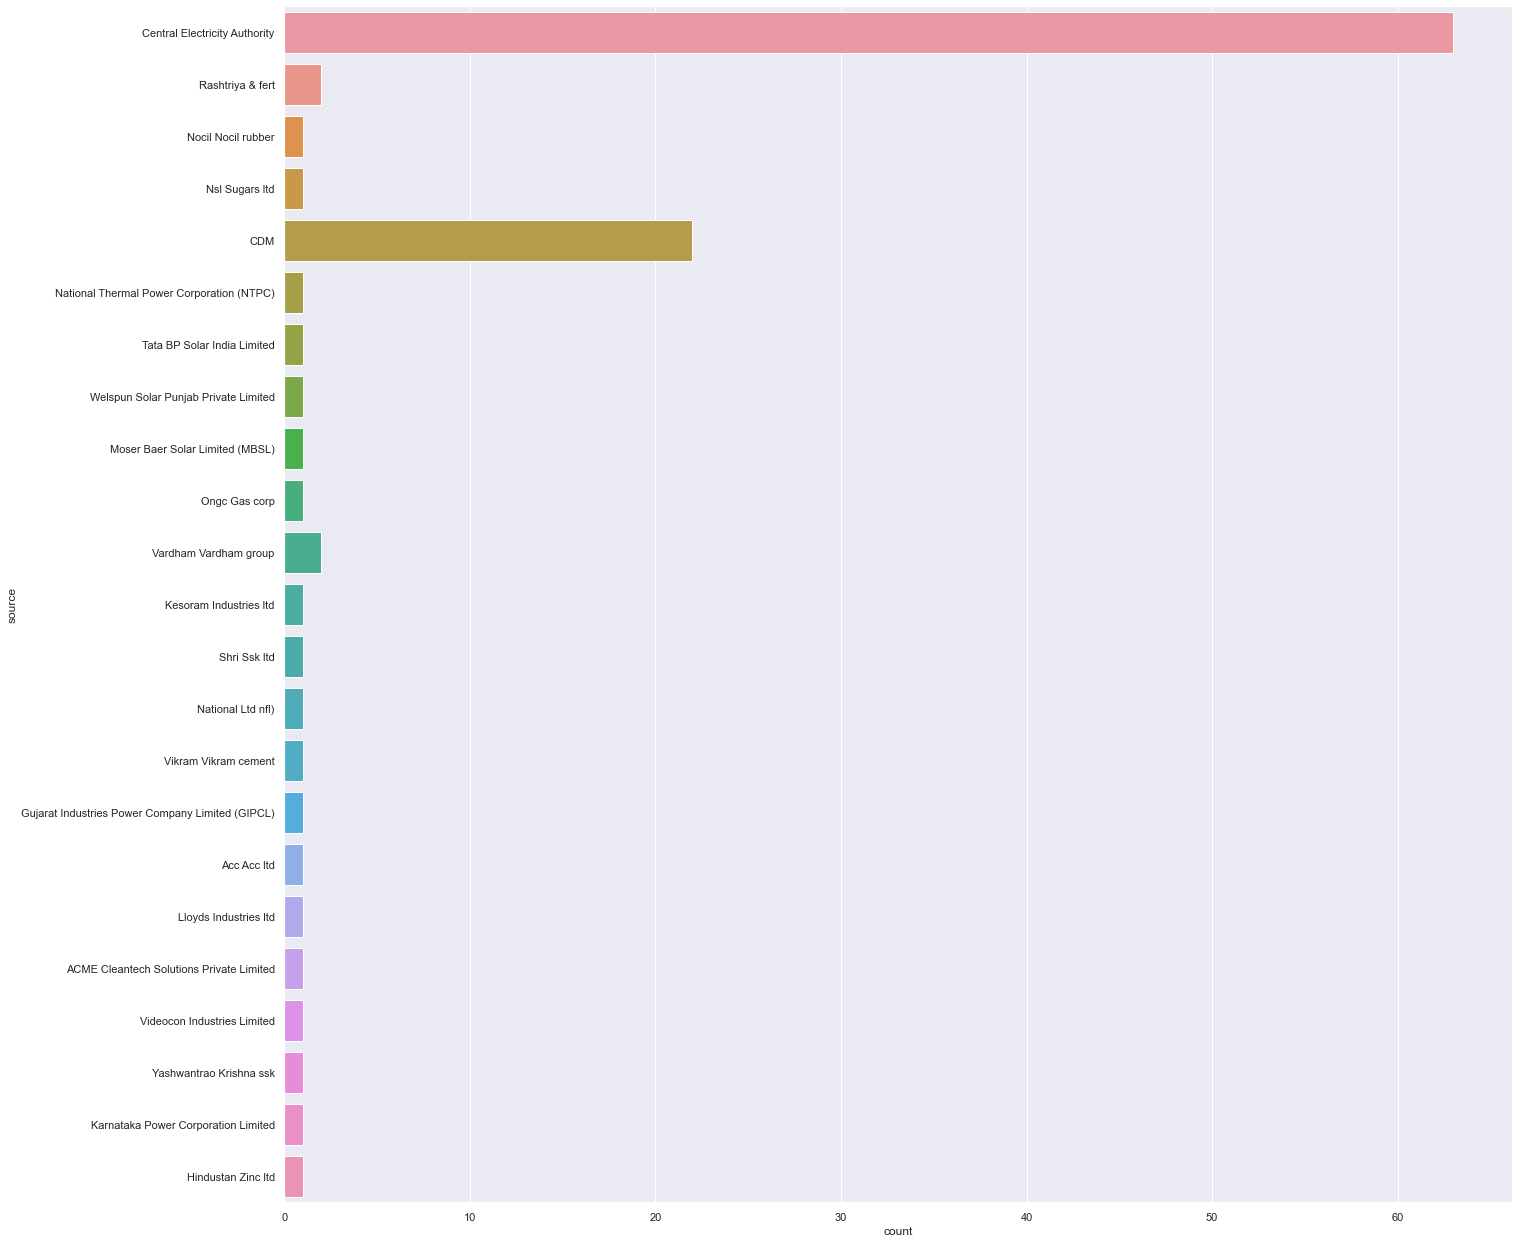

In [351]:
sns.set(rc={'figure.figsize':(22,22)})
ax = sns.countplot(y="source", data=df[800:909])

From the above countplots for the whole dataset "Source " column ,we can say that CENTRAL ELECTRICITY AUTHORITY is the most important source of these details ,since it incorporates most of the data

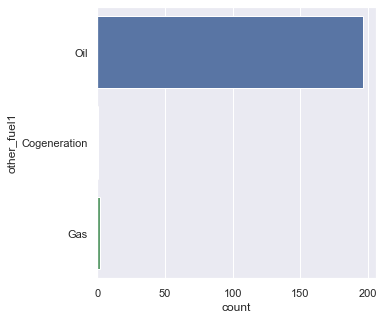

In [352]:
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.countplot(y="other_fuel1", data=df)

In other_fuel1 column we can see that oil is dominating

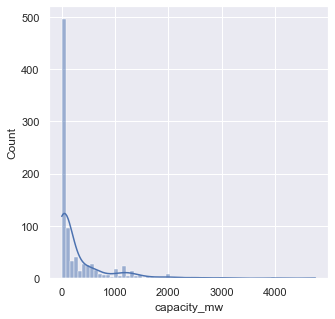

In [353]:
#Lets plot the capacity_mw distribution curve.  
sns.histplot(data=df, x="capacity_mw", kde=True)

We can see that the distribution curve of capacity_mw is skewed to the right side

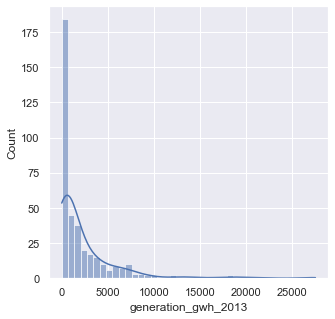

In [354]:
#Lets plot the generation_gwh_2013 distribution curve.  
sns.histplot(data=df, x="generation_gwh_2013", kde=True)

The distribution curve of the generation_gwh_2013 is skewed to the right side

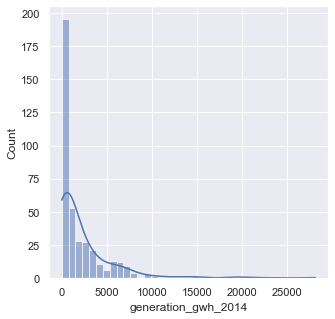

In [355]:
#Lets plot the generation_gwh_2014 distribution curve.  
sns.histplot(data=df, x="generation_gwh_2014", kde=True)

The distribution curve of the generation_gwh_2014 is skewed to the right side

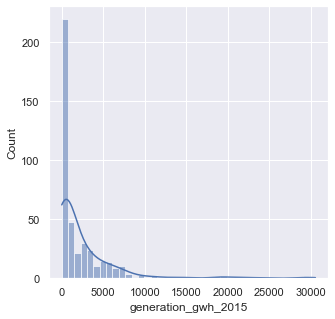

In [356]:
#Lets plot the generation_gwh_2015 distribution curve.  
sns.histplot(data=df, x="generation_gwh_2015", kde=True)

The distribution curve of the generation_gwh_2015 is skewed to the right side

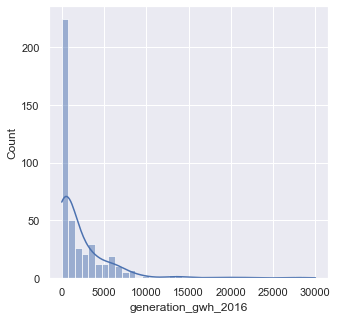

In [357]:
#Lets plot the generation_gwh_2016 distribution curve.  
sns.histplot(data=df, x="generation_gwh_2016", kde=True)

The distribution curve of the generation_gwh_2016 is skewed to the right side

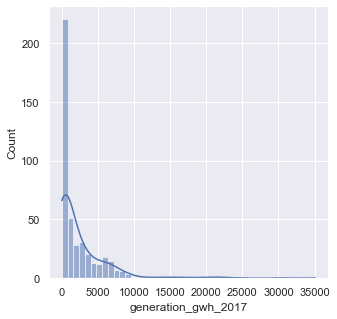

In [358]:
#Lets plot the generation_gwh_2017 distribution curve.  
sns.histplot(data=df, x="generation_gwh_2017", kde=True)

The distribution curve of the generation_gwh_2017 is skewed to the right side

In [359]:
   df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [360]:
#lets delete those columns in which approximately 50 percent values are nan.
df=df.drop(['generation_gwh_2013',"generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_data_source","url","other_fuel1","owner","commissioning_year","year_of_capacity_data"], axis = 1)


In [361]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'source', 'geolocation_source'],
      dtype='object')

In [362]:
len(df["name"].unique())

908

In [363]:
len(df["gppd_idnr"].unique())

908

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                908 non-null    object 
 1   gppd_idnr           908 non-null    object 
 2   capacity_mw         908 non-null    float64
 3   latitude            862 non-null    float64
 4   longitude           862 non-null    float64
 5   primary_fuel        908 non-null    object 
 6   source              908 non-null    object 
 7   geolocation_source  889 non-null    object 
dtypes: float64(3), object(5)
memory usage: 56.9+ KB


In [365]:
#Since both column of "name " & "gppd_idnr" contain unique values in each row ,hence we will eliminate of the row because it is not required.
df=df.drop(["gppd_idnr"],axis=1)

In [366]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,CDM,WRI
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI
...,...,...,...,...,...,...,...
903,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI
904,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About
905,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,CDM,WRI
906,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI


In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                908 non-null    object 
 1   capacity_mw         908 non-null    float64
 2   latitude            862 non-null    float64
 3   longitude           862 non-null    float64
 4   primary_fuel        908 non-null    object 
 5   source              908 non-null    object 
 6   geolocation_source  889 non-null    object 
dtypes: float64(3), object(4)
memory usage: 49.8+ KB


In [368]:
df["geolocation_source"].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [369]:
df["source"].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Coal Mi ICM                                    1
Moserbaer Solar                                1
Ambed K Sugar                                  1
Videocon Industries Limited                    1
Natural Alliend indust                         1
Name: source, Length: 191, dtype: int64

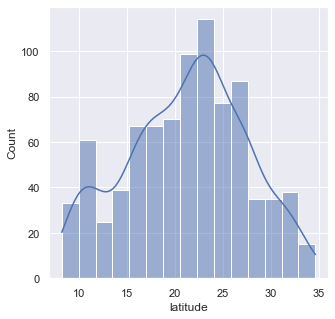

In [370]:
#Lets plot the latitude distribution curve.  
sns.histplot(data=df, x="latitude", kde=True)

We can see that the distribution curve of the latitude is skewed to the left hand side.

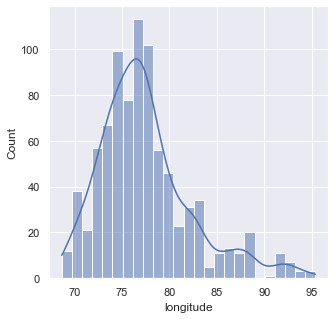

In [371]:
#Lets plot the longitude distribution curve.  
sns.histplot(data=df, x="longitude", kde=True)

We can see the distribution curve of the longitude is skewed to the right hand side.

In [372]:
#As we have seen that both our latitude and longitude contains skewness hence we will impute the nan value with the median.
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df.iloc[:,2:4])
df.iloc[:,2:4]=imp.transform(df.iloc[:,2:4])

In [373]:
df.isnull().sum()

name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
source                 0
geolocation_source    19
dtype: int64

In [374]:
df["geolocation_source"].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [375]:
df["geolocation_source"].fillna("WRI", inplace = True)

In [376]:
df.isnull().sum()

name                  0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

Now,WE do not have any null values present in our dataset

In [377]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,CDM,WRI
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI
...,...,...,...,...,...,...,...
903,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI
904,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About
905,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,CDM,WRI
906,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI


In [378]:
df["primary_fuel"].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [379]:
df["geolocation_source"].value_counts()

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

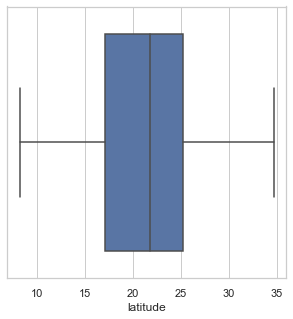

In [380]:
#lets check the outliers in columns like "Capacity_mw","latitude","longitude".
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["latitude"])

We do not have any outliers in latitude.

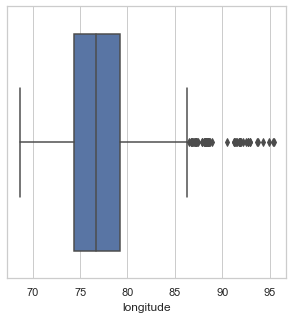

In [381]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["longitude"])

We have many outliers present in the longitude

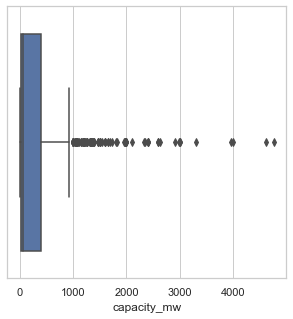

In [382]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["capacity_mw"])

We have many outliers present in the capacity_mw

In [383]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,CDM,WRI
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI
...,...,...,...,...,...,...,...
903,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI
904,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About
905,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,CDM,WRI
906,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI


In [384]:
df.isnull().sum()

name                  0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

In [385]:
#lets take first label variable as capacity_mw
df["geolocation_source"].value_counts()



WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [386]:
df["source"].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Coal Mi ICM                                    1
Moserbaer Solar                                1
Ambed K Sugar                                  1
Videocon Industries Limited                    1
Natural Alliend indust                         1
Name: source, Length: 191, dtype: int64

In [387]:
#Creating dummy columns for the nominal categorical variables and dropping one column from each to counter multicollinearity.
categorical_cols = ["geolocation_source","primary_fuel"] 
df2 = pd.get_dummies(df, columns = categorical_cols,drop_first=True)

In [388]:
df2

,name,capacity_mw,latitude,longitude,source,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,ACME Solar Tower,2.5,28.1839,73.2407,National Renewable Energy Laboratory,1,0,0,0,0,0,0,1,0
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Ultratech Cement ltd,0,1,1,0,0,0,0,0,0
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,CDM,0,1,0,0,0,0,0,0,1
3,AGARTALA GT,135.0,23.8712,91.3602,Central Electricity Authority,0,1,0,1,0,0,0,0,0
4,AKALTARA TPP,1800.0,21.9603,82.4091,Central Electricity Authority,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,1600.0,16.2949,77.3568,Central Electricity Authority,0,1,1,0,0,0,0,0,0
904,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Karnataka Power Corporation Limited,0,0,0,0,0,0,0,1,0
905,Yelisirur wind power project,25.5,15.2758,75.5811,CDM,0,1,0,0,0,0,0,0,1
906,ZAWAR MINES,80.0,24.3500,73.7477,Hindustan Zinc ltd,0,1,1,0,0,0,0,0,0


In [389]:
df=df2.drop(['name',"source"], axis = 1)

In [390]:
df

,capacity_mw,latitude,longitude,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,2.5,28.1839,73.2407,1,0,0,0,0,0,0,1,0
1,98.0,24.7663,74.6090,0,1,1,0,0,0,0,0,0
2,39.2,21.9038,69.3732,0,1,0,0,0,0,0,0,1
3,135.0,23.8712,91.3602,0,1,0,1,0,0,0,0,0
4,1800.0,21.9603,82.4091,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,0,1,1,0,0,0,0,0,0
904,3.0,12.8932,78.1654,0,0,0,0,0,0,0,1,0
905,25.5,15.2758,75.5811,0,1,0,0,0,0,0,0,1
906,80.0,24.3500,73.7477,0,1,1,0,0,0,0,0,0


In [391]:
#Defining a function which return the list of indices where outliers are present.
def outliers(dataframe,feature):
    Q1=dataframe[feature].quantile(0.25)
    Q3=dataframe[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    ls=dataframe.index[(dataframe[feature]<lower_bound) | (dataframe[feature]>upper_bound)]
    return ls

In [392]:
#Create an empty list to store the output indices from the multiple columns.

index_list=[]
for feature in["longitude","latitude","capacity_mw"]:
    index_list.extend(outliers(df,feature))

In [393]:
index_list

[3,
 45,
 51,
 59,
 104,
 108,
 152,
 158,
 178,
 180,
 184,
 189,
 190,
 210,
 240,
 245,
 254,
 279,
 288,
 297,
 300,
 309,
 324,
 334,
 341,
 353,
 361,
 368,
 389,
 417,
 428,
 455,
 456,
 472,
 473,
 481,
 500,
 520,
 530,
 547,
 568,
 571,
 623,
 637,
 639,
 640,
 653,
 679,
 694,
 734,
 794,
 796,
 797,
 798,
 799,
 800,
 810,
 819,
 841,
 848,
 849,
 4,
 10,
 12,
 15,
 18,
 45,
 58,
 62,
 76,
 79,
 94,
 144,
 148,
 159,
 163,
 167,
 168,
 169,
 190,
 210,
 280,
 281,
 282,
 289,
 298,
 309,
 311,
 316,
 320,
 325,
 335,
 351,
 353,
 360,
 364,
 365,
 367,
 369,
 374,
 376,
 379,
 391,
 392,
 415,
 418,
 450,
 456,
 469,
 472,
 473,
 474,
 483,
 494,
 495,
 526,
 527,
 533,
 536,
 545,
 560,
 566,
 579,
 580,
 595,
 598,
 619,
 623,
 624,
 626,
 627,
 631,
 633,
 645,
 646,
 649,
 654,
 655,
 658,
 677,
 679,
 683,
 692,
 696,
 698,
 701,
 708,
 722,
 724,
 725,
 727,
 741,
 744,
 768,
 787,
 788,
 789,
 793,
 800,
 801,
 809,
 821,
 822,
 842,
 843,
 846,
 850,
 868,
 877,
 88

In [394]:
#define  a function called remove  which returns a cleaned dataframe without outliers
def remove(dataframe,index_list):
    index_list=sorted(set(index_list))
    dataframe=dataframe.drop(index_list)
    return dataframe


In [395]:
#Dataframe without outlier.
df_cl=remove(df,index_list)

In [396]:
#Lets check for the skewness present in the numerical columns
df_cl.skew()

capacity_mw                                                 1.869191
latitude                                                   -0.027070
longitude                                                   0.383466
geolocation_source_National Renewable Energy Laboratory    13.573724
geolocation_source_WRI                                     -1.836422
primary_fuel_Coal                                           1.433429
primary_fuel_Gas                                            3.268973
primary_fuel_Hydro                                          0.966277
primary_fuel_Nuclear                                       12.115974
primary_fuel_Oil                                            5.717006
primary_fuel_Solar                                          1.783838
primary_fuel_Wind                                           1.809873
dtype: float64

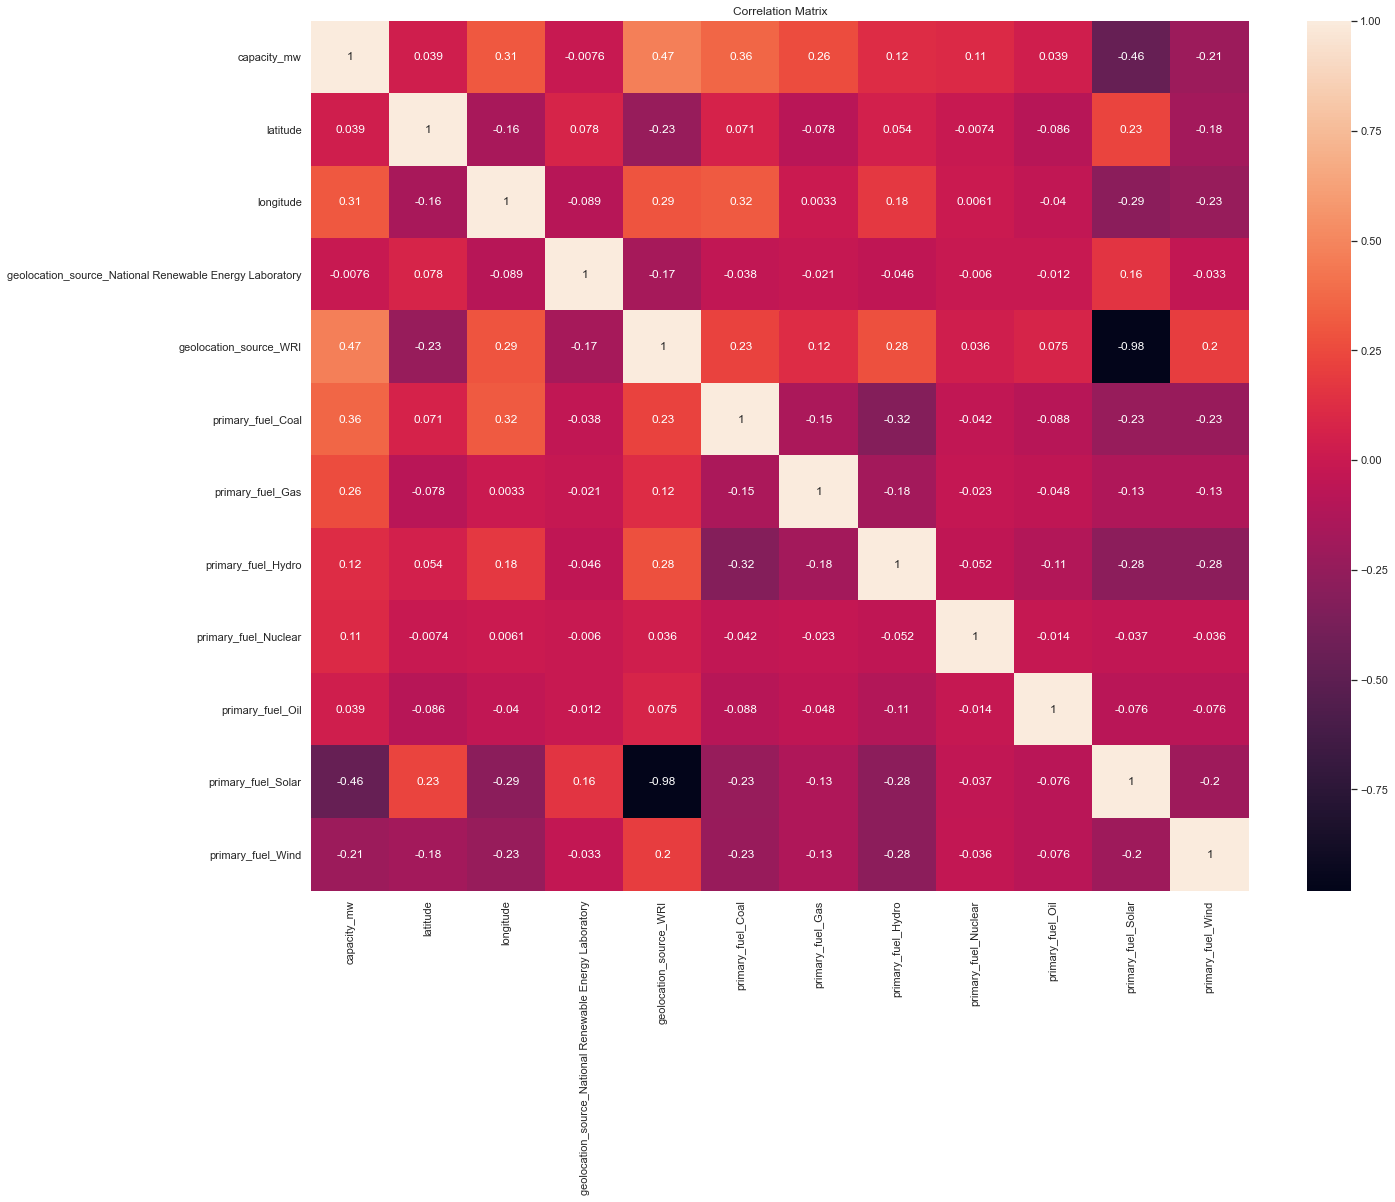

In [426]:
#lets plot the heatmap to check the correlation between dependent and independent  variables.
corr_mat=df_cl.corr()
plt.figure(figsize=[21,16])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

There is a good positive correlation between capacity_mw and geolocation_source_WRI.

We can see that our continuous features have skewness and we should remove it

In [398]:
#Lets use power transform method to remove the skewness .
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(df_cl.iloc[:,0:3])
df_cl.iloc[:,0:3]=pt.transform(df_cl.iloc[:,0:3])

In [399]:
df_cl

,capacity_mw,latitude,longitude,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,-1.662601,1.156360,-0.887570,1,0,0,0,0,0,0,1,0
1,0.500264,0.620473,-0.441629,0,1,1,0,0,0,0,0,0
2,-0.064540,0.168000,-2.283019,0,1,0,0,0,0,0,0,1
5,1.069558,0.463213,-2.570660,0,1,1,0,0,0,0,0,0
6,0.198440,-1.686486,0.287350,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.551801,-1.247492,0.453079,0,1,0,0,0,0,1,0,0
904,-1.572535,-1.283958,0.616970,0,0,0,0,0,0,0,1,0
905,-0.330209,-0.895188,-0.138425,0,1,0,0,0,0,0,0,1
906,0.375650,0.554885,-0.719639,0,1,1,0,0,0,0,0,0


In [400]:
df_cl.skew()

capacity_mw                                                 0.011639
latitude                                                   -0.068180
longitude                                                  -0.000937
geolocation_source_National Renewable Energy Laboratory    13.573724
geolocation_source_WRI                                     -1.836422
primary_fuel_Coal                                           1.433429
primary_fuel_Gas                                            3.268973
primary_fuel_Hydro                                          0.966277
primary_fuel_Nuclear                                       12.115974
primary_fuel_Oil                                            5.717006
primary_fuel_Solar                                          1.783838
primary_fuel_Wind                                           1.809873
dtype: float64

We can see that we have reduced the skewness in the column "capacity_mw","latitude" & "longitude" considerably.

In [401]:
#Bifurcating the dataset into independent and dependent variables.
y=df_cl.iloc[:,0]
x=df_cl.iloc[:,1:]

In [402]:
x

,latitude,longitude,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind
0,1.156360,-0.887570,1,0,0,0,0,0,0,1,0
1,0.620473,-0.441629,0,1,1,0,0,0,0,0,0
2,0.168000,-2.283019,0,1,0,0,0,0,0,0,1
5,0.463213,-2.570660,0,1,1,0,0,0,0,0,0
6,-1.686486,0.287350,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
902,-1.247492,0.453079,0,1,0,0,0,0,1,0,0
904,-1.283958,0.616970,0,0,0,0,0,0,0,1,0
905,-0.895188,-0.138425,0,1,0,0,0,0,0,0,1
906,0.554885,-0.719639,0,1,1,0,0,0,0,0,0


Splitting the dataset into training and test set

In [403]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [404]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

Standard scaling the dataset

In [405]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train.iloc[:,0:2]=sc.fit_transform(x_train.iloc[:,0:2])
x_test.iloc[:,0:2]=sc.transform(x_test.iloc[:,0:2])

In [406]:
#IMPORTING DIFFERENT METRICS AND MACHINE LEARNING MODELS
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [407]:
#finding best random_state
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range (1,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best r2_score is ",maxAccu,'on Random_state',maxRS)

Best r2_score is  0.5466541734972928 on Random_state 77


In [408]:
#DecisionTreeRegressor model
dtr=DecisionTreeRegressor()

dtr.fit(x_train,y_train)
ad_pred=dtr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))

0.11798121363161373
0.928550332745704


In [409]:
#knearest Neighbours regressor model
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
ad_pred=knr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))

0.46462238037308035
0.5636218576432324


In [410]:
#AdaBoost Regressor model
abr=AdaBoostRegressor()

abr.fit(x_train,y_train)
ad_pred=abr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))

0.42730652164010785
0.6029063418046858


In [411]:
#Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)
ad_pred=lr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))

0.5148946855985556
0.5106974001753707


In [412]:
#Gradient boosting model
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
ad_pred=gbr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))

0.5164607912144898
0.5090486735118738


In [413]:
#Support vector Regressor model
svr=SVR()
svr.fit(x_train,y_train)
ad_pred=svr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))

0.5097770045303678
0.5160850682525077


In [414]:
#RandomForest Regressor model
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
ad_pred=rfr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))

0.44973157639076633
0.5792982368840411


In [415]:
from sklearn.linear_model import Lasso,Ridge
regressor_ridge=Ridge(alpha=50)
regressor_ridge.fit(x_train,y_train)
print("Linear Model Coefficient (m) :",regressor_ridge.coef_)
print('Linear Model Coefficient (b) :',regressor_ridge.intercept_)
ad_pred=regressor_ridge.predict(x_test)

Linear Model Coefficient (m) : [ 0.11434836  0.12784394  0.0538085   0.41590606  0.42523636  0.3923914
  0.0606706   0.04936704  0.09722688 -0.39766409 -0.25552946]
Linear Model Coefficient (b) : -0.3987423475910224


In [416]:
RMSE=float(format(np.sqrt(mean_squared_error(y_test,ad_pred)),'0.3f'))
MSE=mean_squared_error(y_test,ad_pred)
r2=r2_score(y_test,ad_pred)
print("RMSE=",RMSE,"\nMSE=",MSE,"\nr2=",r2)


RMSE= 0.788 
MSE= 0.620326569335626 
r2= 0.4107592571534676


In [417]:
#lETS DO THE CROSS VALIDATION TO CHECK THE OVERFITTING OF THE MODELS.
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of LinearRegression model :",scr.mean())
scr=cross_val_score(gbr,x,y,cv=5)
print("Cross validation score of gradientBoostingRegression model :",scr.mean())
scr=cross_val_score(svr,x,y,cv=5)
print("Cross validation score of Support vector regression model :",scr.mean())
scr=cross_val_score(abr,x,y,cv=5)
print("Cross validation score of AdaBoostRegressor model :",scr.mean())
scr=cross_val_score(knr,x,y,cv=5)
print("Cross validation score of Knearest neighbour regressor model :",scr.mean())
scr=cross_val_score(dtr,x,y,cv=5)
print("Cross validation score of DecisionTreeRegressor model :",scr.mean())
scr=cross_val_score(rfr,x,y,cv=5)
print("Cross validation score of RandomForestRegressor model :",scr.mean())
scr=cross_val_score(regressor_ridge,x,y,cv=5)
print("Cross validation score of Ridge Regression model :",scr.mean())

Cross validation score of LinearRegression model : 0.40654570673688034
Cross validation score of gradientBoostingRegression model : 0.4409090775560527
Cross validation score of Support vector regression model : 0.4290009165103652
Cross validation score of AdaBoostRegressor model : 0.35452513297709853
Cross validation score of Knearest neighbour regressor model : 0.42706414841995066
Cross validation score of DecisionTreeRegressor model : 0.0748173582052722
Cross validation score of RandomForestRegressor model : 0.41050187683032285
Cross validation score of Ridge Regression model : 0.35864135259483393


OUR BEST PERFORMING MODEL FOR THIS DATASET IS RANDOM FOREST REGRESSOR MODEL,SINCE THE DIFFERENCE BETWEEN THE r2_score AND THE cross_val_score IS MINIMUM FOR THE RANDOM FOREST REGRESSOR MODEL.

Lets do the hyperparameter tuning for better accuracy

In [418]:
from sklearn.model_selection import GridSearchCV

In [419]:
parameters={"criterion":('mse', 'mae'),"max_features":('auto', 'sqrt', 'log2'),}

In [420]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [421]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2')})

In [422]:
GCV.best_params_

{'criterion': 'mse', 'max_features': 'log2'}

In [423]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [424]:
r2_score(y_test,GCV_pred)

0.43292480501176944

In [425]:
#Dumping our model
import joblib   
joblib.dump(GCV.best_estimator_,"global_power_rfr.pkl")

['global_power_rfr.pkl']